In [1]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier

In [2]:
# ml_df = pd.read_csv('IPS_payload_200000_sql_result_df_result.csv')
ml_df = pd.read_excel('IPS_payload_200000_sql_result_df_result.xlsx')

ml_df.columns

Index(['label', 'payload', 'ips_00013_payload_length_value',
       'ips_00014_payload_logscaled_length_value',
       'ips_00015_payload_sys_manager_flag',
       'ips_00016_payload_sys_console_flag',
       'ips_00017_payload_sys_admin_flag', 'ips_00018_payload_sys_setup_flag',
       'ips_00019_payload_sys_config_flag',
       'ips_00020_payload_sys_server_flag',
       'ips_00021_payload_char_single_quotation_cnt',
       'ips_00022_payload_char_double_quotation_cnt',
       'ips_00023_payload_char_equal_cnt', 'ips_00024_payload_char_plus_cnt',
       'ips_00025_payload_char_star_cnt', 'ips_00026_payload_char_slush_cnt',
       'ips_00027_payload_char_lt_cnt', 'ips_00028_payload_char_at_cnt',
       'ips_00029_payload_char_parent_cnt',
       'ips_00030_payload_char_bracket_cnt',
       'ips_00031_payload_char_dollar_cnt',
       'ips_00032_payload_char_double_dot_cnt',
       'ips_00033_payload_sql_and_flag', 'ips_00034_payload_sql_or_flag',
       'ips_00035_payload_sql_select_fl

In [3]:
ml_df.head()

,label,payload,ips_00013_payload_length_value,ips_00014_payload_logscaled_length_value,ips_00015_payload_sys_manager_flag,ips_00016_payload_sys_console_flag,ips_00017_payload_sys_admin_flag,ips_00018_payload_sys_setup_flag,ips_00019_payload_sys_config_flag,ips_00020_payload_sys_server_flag,...,ips_00050_payload_cmd_config_flag,ips_00051_payload_cmd_ls_flag,ips_00052_payload_cmd_mkdir_flag,ips_00053_payload_cmd_netstat_flag,ips_00054_payload_cmd_ftp_flag,ips_00055_payload_cmd_cat_flag,ips_00056_payload_cmd_dir_flag,ips_00057_payload_cmd_wget_flag,ips_00058_payload_cmd_echo_flag,ips_00059_payload_cmd_rm_flag
0,O,OPTIONS sip:100@27.101.32.15 SIP/2.0Via: SIP/2...,391,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,O,POST /statistics?clienttype=8&devuid=BDIMXV2%2...,758,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,X,GET /ad/p/in/v1_0/imp?slotid=stw_incruit11_134...,411,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,O,d1:rd2:id20:\n..xC...kw....).!e1:t2:$1:y1:re,43,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O,d1:rd2:id20: -^.A.8 '.g%c.U$P2:ip4:e.e1:t2:31:...,58,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ml_df = ml_df.drop(['payload'], axis = 1)

In [5]:
ml_df.dtypes

label                                          object
ips_00013_payload_length_value                  int64
ips_00014_payload_logscaled_length_value        int64
ips_00015_payload_sys_manager_flag              int64
ips_00016_payload_sys_console_flag              int64
ips_00017_payload_sys_admin_flag                int64
ips_00018_payload_sys_setup_flag                int64
ips_00019_payload_sys_config_flag               int64
ips_00020_payload_sys_server_flag               int64
ips_00021_payload_char_single_quotation_cnt     int64
ips_00022_payload_char_double_quotation_cnt     int64
ips_00023_payload_char_equal_cnt                int64
ips_00024_payload_char_plus_cnt                 int64
ips_00025_payload_char_star_cnt                 int64
ips_00026_payload_char_slush_cnt                int64
ips_00027_payload_char_lt_cnt                   int64
ips_00028_payload_char_at_cnt                   int64
ips_00029_payload_char_parent_cnt               int64
ips_00030_payload_char_brack

In [6]:
ml_df['label'] = np.where(ml_df['label'] == 'O', 1, 0)
ml_df['label'].value_counts()

1    147613
0     52387
Name: label, dtype: int64

LightGBM

In [7]:
# lgb_clf = LGBMClassifier(random_state=127127, tree_method = 'gpu_hist', device = 'gpu')
lgb_clf = LGBMClassifier(random_state=127127)

In [8]:
lgb_clf.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 127127,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(ml_df, test_size= 0.2,
                                    stratify=ml_df['label'], random_state= 7171)

In [10]:
X_train = train_df.iloc[:, 1:]
y_train = train_df['label']

X_test = test_df.iloc[:, 1:]
y_test = test_df['label']

In [11]:
lgb_clf.fit(X_train, y_train)

LGBMClassifier(random_state=127127)

LightGBM 모델 저장

In [13]:
import pickle
import os
saved_model_path = '모델 저장 경로'

# pickle.dump(lgb_clf, open(os.path.join(saved_model_path, 'DSS_IPS_LightGBM.pkl'), 'wb'))

LightGBM 모델 성능 측정

In [14]:
y_pred = lgb_clf.predict(X_test)

# LGB_AI: 예측 라벨
test_df['LGB_AI'] = y_pred
test_df['LGB_AI'].value_counts()

1    30112
0     9888
Name: LGB_AI, dtype: int64

In [15]:
y_pred_proba = lgb_clf.predict_proba(X_test)
y_pred_proba

array([[1.87777828e-02, 9.81222217e-01],
       [5.95432716e-04, 9.99404567e-01],
       [5.61693697e-01, 4.38306303e-01],
       ...,
       [9.98388395e-01, 1.61160509e-03],
       [7.05676379e-03, 9.92943236e-01],
       [8.20789780e-03, 9.91792102e-01]])

In [16]:
# LGB_AI_proba: 예측 라벨 별, 확률
test_df['LGB_AI_Attack_proba'] = y_pred_proba[:, 1]
test_df['LGB_AI_Normal_proba'] = y_pred_proba[:, 0]

In [17]:
test_df[['label', 'LGB_AI', 'LGB_AI_Attack_proba', 'LGB_AI_Normal_proba']].head(10)

,label,LGB_AI,LGB_AI_Attack_proba,LGB_AI_Normal_proba
69321,1,1,0.981222,0.018778
45959,1,1,0.999405,0.000595
127394,1,0,0.438306,0.561694
65180,1,1,0.993462,0.006538
25184,1,1,0.992059,0.007941
41453,1,1,0.996344,0.003656
5893,1,1,0.996344,0.003656
71685,1,1,0.932944,0.067056
187715,1,1,0.994598,0.005402
183931,1,1,0.996344,0.003656


In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

lgb_cm = confusion_matrix(y_test, y_pred)
lgb_cm

array([[ 9572,   905],
       [  316, 29207]])

/Users/choiwb/miniforge3/envs/newenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


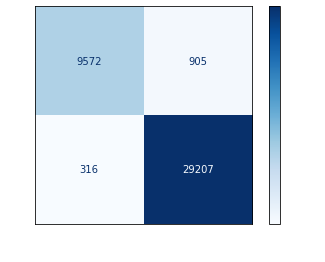

In [19]:
import matplotlib.pyplot as plt

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plot_confusion_matrix(lgb_clf, X_test, y_test, cmap = 'Blues')
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(test_df['label'], test_df['LGB_AI'], labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     10477
           1       0.97      0.99      0.98     29523

    accuracy                           0.97     40000
   macro avg       0.97      0.95      0.96     40000
weighted avg       0.97      0.97      0.97     40000



In [21]:
test_df.columns

Index(['label', 'ips_00013_payload_length_value',
       'ips_00014_payload_logscaled_length_value',
       'ips_00015_payload_sys_manager_flag',
       'ips_00016_payload_sys_console_flag',
       'ips_00017_payload_sys_admin_flag', 'ips_00018_payload_sys_setup_flag',
       'ips_00019_payload_sys_config_flag',
       'ips_00020_payload_sys_server_flag',
       'ips_00021_payload_char_single_quotation_cnt',
       'ips_00022_payload_char_double_quotation_cnt',
       'ips_00023_payload_char_equal_cnt', 'ips_00024_payload_char_plus_cnt',
       'ips_00025_payload_char_star_cnt', 'ips_00026_payload_char_slush_cnt',
       'ips_00027_payload_char_lt_cnt', 'ips_00028_payload_char_at_cnt',
       'ips_00029_payload_char_parent_cnt',
       'ips_00030_payload_char_bracket_cnt',
       'ips_00031_payload_char_dollar_cnt',
       'ips_00032_payload_char_double_dot_cnt',
       'ips_00033_payload_sql_and_flag', 'ips_00034_payload_sql_or_flag',
       'ips_00035_payload_sql_select_flag', 'ips_0

In [22]:
test_df.shape

(40000, 51)

CatBoost

In [23]:
from catboost import CatBoostClassifier
cbc_clf = CatBoostClassifier(random_state=127127)

In [24]:
cbc_clf.get_params()

{'random_state': 127127}

In [25]:
cbc_clf.fit(X_train, y_train)

Learning rate set to 0.089969
0:	learn: 0.5856064	total: 72.4ms	remaining: 1m 12s
1:	learn: 0.5186114	total: 86.1ms	remaining: 43s
2:	learn: 0.4479155	total: 101ms	remaining: 33.5s
3:	learn: 0.4037551	total: 113ms	remaining: 28.1s
4:	learn: 0.3744122	total: 126ms	remaining: 25.1s
5:	learn: 0.3466861	total: 138ms	remaining: 22.9s
6:	learn: 0.3215123	total: 150ms	remaining: 21.3s
7:	learn: 0.3066885	total: 162ms	remaining: 20.1s
8:	learn: 0.2871703	total: 175ms	remaining: 19.2s
9:	learn: 0.2698036	total: 187ms	remaining: 18.5s
10:	learn: 0.2587814	total: 200ms	remaining: 18s
11:	learn: 0.2492746	total: 212ms	remaining: 17.4s
12:	learn: 0.2401798	total: 226ms	remaining: 17.2s
13:	learn: 0.2352061	total: 241ms	remaining: 16.9s
14:	learn: 0.2236412	total: 254ms	remaining: 16.7s
15:	learn: 0.2181589	total: 266ms	remaining: 16.3s
16:	learn: 0.2139838	total: 278ms	remaining: 16.1s
17:	learn: 0.2102345	total: 289ms	remaining: 15.8s
18:	learn: 0.2052739	total: 301ms	remaining: 15.5s
19:	learn: 0

CatBoost 모델 저장

In [26]:
import pickle
import os
saved_model_path = '모델 저장 경로'

# pickle.dump(cbc_clf, open(os.path.join(saved_model_path, 'DSS_IPS_CatBoost.pkl'), 'wb'))

CatBoost 모델 성능 측정

In [27]:
y_pred = cbc_clf.predict(X_test)

# CBC_AI: 예측 라벨
test_df['CBC_AI'] = y_pred
test_df['CBC_AI'].value_counts()

1    30076
0     9924
Name: CBC_AI, dtype: int64

In [28]:
y_pred_proba = cbc_clf.predict_proba(X_test)
y_pred_proba

array([[1.13360485e-02, 9.88663952e-01],
       [8.83046610e-05, 9.99911695e-01],
       [3.97762138e-02, 9.60223786e-01],
       ...,
       [9.97134612e-01, 2.86538802e-03],
       [3.62398019e-03, 9.96376020e-01],
       [4.31257458e-03, 9.95687425e-01]])

In [34]:
# CBC_AI_proba: 예측 라벨 별, 확률
test_df['CBC_AI_Attack_proba'] = y_pred_proba[:, 1]
test_df['CBC_AI_Normal_proba'] = y_pred_proba[:, 0]

In [35]:
test_df[['label', 'LGB_AI', 'CBC_AI_Attack_proba', 'CBC_AI_Normal_proba']].head(10)

,label,LGB_AI,CBC_AI_Attack_proba,CBC_AI_Normal_proba
69321,1,1,0.988664,0.011336
45959,1,1,0.999912,0.000088
127394,1,0,0.960224,0.039776
65180,1,1,0.996813,0.003187
25184,1,1,0.996748,0.003252
41453,1,1,0.998204,0.001796
5893,1,1,0.998204,0.001796
71685,1,1,0.971301,0.028699
187715,1,1,0.996924,0.003076
183931,1,1,0.998204,0.001796


In [29]:
cbc_cm = confusion_matrix(y_test, y_pred)
cbc_cm

array([[ 9667,   810],
       [  257, 29266]])

/Users/choiwb/miniforge3/envs/newenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


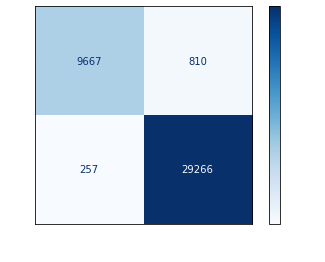

In [30]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plot_confusion_matrix(cbc_clf, X_test, y_test, cmap = 'Blues')
plt.show()

In [31]:
print(classification_report(test_df['label'], test_df['CBC_AI'], labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10477
           1       0.97      0.99      0.98     29523

    accuracy                           0.97     40000
   macro avg       0.97      0.96      0.96     40000
weighted avg       0.97      0.97      0.97     40000



In [32]:
test_df.columns

Index(['label', 'ips_00013_payload_length_value',
       'ips_00014_payload_logscaled_length_value',
       'ips_00015_payload_sys_manager_flag',
       'ips_00016_payload_sys_console_flag',
       'ips_00017_payload_sys_admin_flag', 'ips_00018_payload_sys_setup_flag',
       'ips_00019_payload_sys_config_flag',
       'ips_00020_payload_sys_server_flag',
       'ips_00021_payload_char_single_quotation_cnt',
       'ips_00022_payload_char_double_quotation_cnt',
       'ips_00023_payload_char_equal_cnt', 'ips_00024_payload_char_plus_cnt',
       'ips_00025_payload_char_star_cnt', 'ips_00026_payload_char_slush_cnt',
       'ips_00027_payload_char_lt_cnt', 'ips_00028_payload_char_at_cnt',
       'ips_00029_payload_char_parent_cnt',
       'ips_00030_payload_char_bracket_cnt',
       'ips_00031_payload_char_dollar_cnt',
       'ips_00032_payload_char_double_dot_cnt',
       'ips_00033_payload_sql_and_flag', 'ips_00034_payload_sql_or_flag',
       'ips_00035_payload_sql_select_flag', 'ips_0

In [33]:
test_df.shape

(40000, 52)

In [36]:
# test_df.to_csv('IPS_payload_LGB_CBC_result.csv', index = False, sep = ',')